## Jupyter Notebook for plotting Terahertz output files

### Imports + Utility Functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

plt.rcParams.update({'font.size': 22})

def radToDeg(x):
    '''
    Convert radiant x to degree.
    '''
    return x * 180 / np.pi

def deleteLinesOfFile(file, numDelimiters, delimiter=';'):
    '''
    Delete lines in file which have wrong number of delimiters.
    '''
    with open(file, "r") as f:
        lines = f.readlines()
    with open(file, "w") as f:
        for line in lines:
            if line.count(delimiter) == numDelimiters:
                f.write(line)

def dB(x):
    return 10 *np.log10(x)

numSamples = 10
numPeriods = 10
numBits = 100
maxNumSamples = numSamples * numPeriods * numBits

### Generated Bit Sequence Plot

Bit sequence:  [0. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
Bit sequence:  [0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 0.]


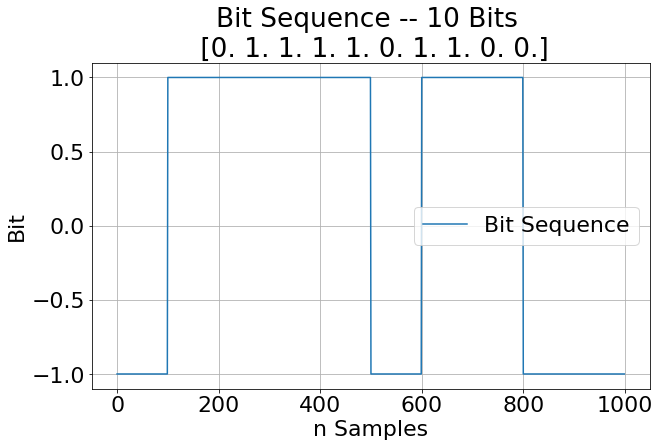

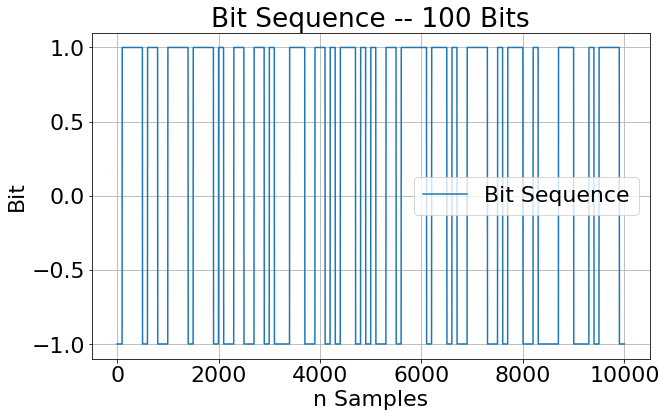

In [22]:
file = "data/output_bit_sequence.csv"
deleteLinesOfFile(file, 1)
for Bits in [10, 100]:
    data = np.genfromtxt(file, delimiter=";", skip_header=1)[:numPeriods * numSamples * Bits][:,1]
    bits = np.array(list(map(int, data[::numBits][:Bits])))
    bits = (bits + 1) / 2
    print("Bit sequence: ", bits)

    plt.figure("generated Bits {}".format(Bits), figsize=(10, 6))
    plt.plot(data, label="Bit Sequence")
    if Bits == 10:
        plt.title("Bit Sequence -- {} Bits \n {}".format(Bits, bits))
    else:
        plt.title("Bit Sequence -- {} Bits".format(Bits))
    plt.xlabel("n Samples")
    plt.ylabel("Bit")
    plt.grid()
    plt.legend()
    plt.savefig("plots/transceiver_plot_generated_bit_sequence_{}_bits.pdf".format(Bits))
    plt.savefig("plots/transceiver_plot_generated_bit_sequence_{}_bits.png".format(Bits))
    plt.savefig("plots/transceiver_plot_generated_bit_sequence_{}_bits.jpeg".format(Bits))
plt.show()

### Demodulated Signal Plot

Bit sequence:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


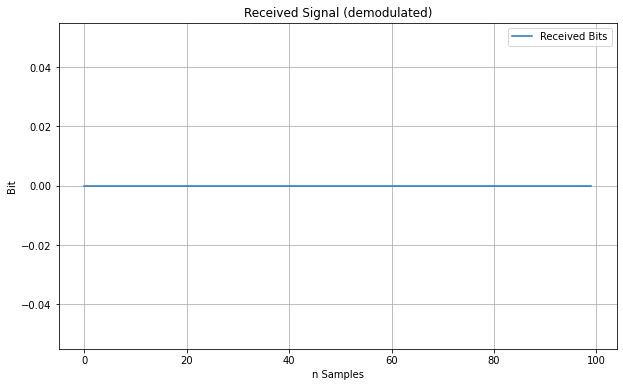

In [16]:
file = "data/output_demod_signal.csv"
deleteLinesOfFile(file, 1)
data = np.genfromtxt(file, delimiter=";", skip_header=1)[:int(numBits/10)][:,1]
data2 = []
for i in range(int(numBits/10)):
    for _ in range(10):
        data2.append(data[i])

bits = list(map(int, data[:10]))
print("Bit sequence: ", bits)

plt.figure("demoded Signal", figsize=(10, 6))
plt.plot(data2, label="Received Bits")
#plt.title("Received Signal (demodulated) {}".format(bits))
plt.title("Received Signal (demodulated)")
plt.xlabel("n Samples")
plt.ylabel("Bit")
plt.grid()
plt.legend()
plt.savefig("plots/transceiver_plot_demod_signal.pdf")
plt.savefig("plots/transceiver_plot_demod_signal.png")
plt.show()

### Testing to validate Demodulation

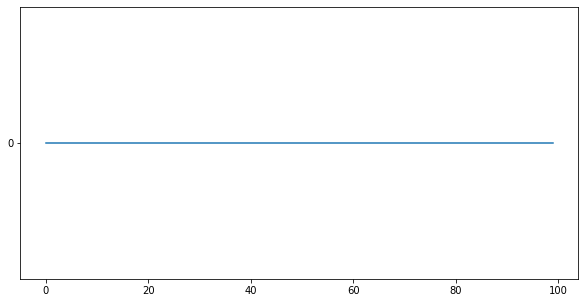

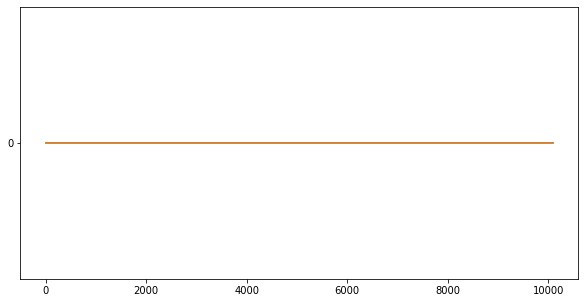

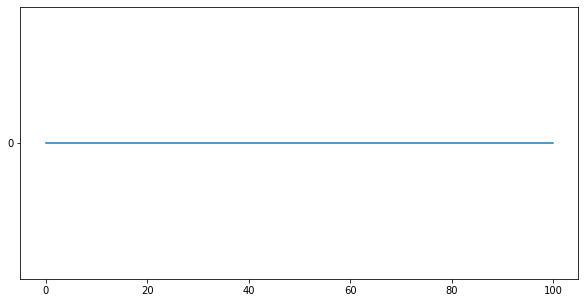

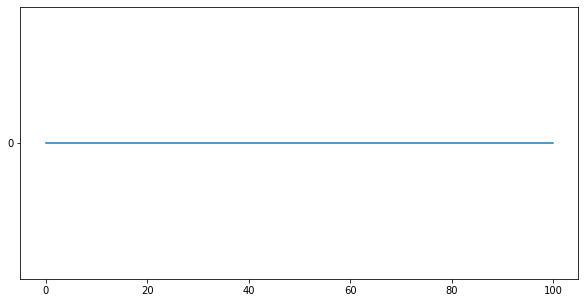

In [3]:
file = "data/terahertz_output_test.csv"
with open(file, "r") as file:
    data = file.read().split("\n")[1:5]
    t = data[0].split(";")
    t.pop()
    b = data[1].split(";")
    b.pop()
    e = data[2].split(";")
    e.pop()
    d = data[3].split(";")
    d.pop()
    
    plt.figure(1, figsize=(10, 5))
    plt.plot(t)
    
    plt.figure(2, figsize=(10, 5))
    plt.plot(b)
    plt.plot([0, len(b)], [0, 0])
    
    plt.figure(3, figsize=(10, 5))
    plt.plot(e)
    
    plt.figure(4, figsize=(10, 5))
    plt.plot(d)
